In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

# modeling imports
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error #model evaluation
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut

# pipeline imports
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer


# make sure you have these to make dendrograms!-------
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt
#-----------------------------------------------------

%matplotlib inline

In [ ]:
data =pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv", encoding= 'unicode_escape')
data.dropna(inplace = True)
data.reset_index(inplace = True)

In [ ]:
data.head()
# data.isnull().sum()

,index,name,age,gender,raceethnicity,month,day,year,streetaddress,city,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


In [ ]:


data = data[data['age'] != 'Unknown']
data = data[data['share_white'] != 'Unknown']
data = data[data['share_black'] != 'Unknown']
data = data[data['share_hispanic'] != 'Unknown']
data = data[data['p_income'] != 'Unknown']
data = data[data['pov'] != 'Unknown']

data['age'] = data['age'].astype(int)
data['pov'] = data['pov'].astype(float)
data['share_white'] = data['share_white'].astype(float)
data['share_black'] = data['share_black'].astype(float)
data['share_hispanic'] = data['share_hispanic'].astype(float)
data['p_income'] = data['p_income'].astype(float)

data['city'] = data['city'].astype(str)
data['state'] = data['state'].astype(str)


In [ ]:
data.dtypes

index                     int64
name                     object
age                       int64
gender                   object
raceethnicity            object
month                    object
day                       int64
year                      int64
streetaddress            object
city                     object
state                    object
latitude                float64
longitude               float64
state_fp                  int64
county_fp                 int64
tract_ce                  int64
geo_id                    int64
county_id                 int64
namelsad                 object
lawenforcementagency     object
cause                    object
armed                    object
pop                       int64
share_white             float64
share_black             float64
share_hispanic          float64
p_income                float64
h_income                float64
county_income             int64
comp_income             float64
county_bucket           float64
nat_buck

In [ ]:
# Question 1: Is there a correlation between a person’s personal income and factors such as gender, age, Tract-level unemployment rate,
# likelihood of having a bachelor's degree, Tract-level poverty rate, and Household income?


In [ ]:
# model 1
# all predictors
predictors = ['gender' ,'age', 'h_income','pov','urate', 'college']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = ['age', 'h_income','pov','urate', 'college']
onehot = ['gender']


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  14221214.894660328
MAE :  2615.509790339935
MAPE:  14221214.894660328
R2  :  0.8106765561749254
MSE :  21541994.965198394
MAE :  2874.2590576162384
MAPE:  21541994.965198394
R2  :  0.7507800704367357


In [ ]:
#model 2
#no college
predictors = ['gender' ,'age', 'h_income','pov','urate']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = ['age', 'h_income','pov','urate']
onehot = ['gender']


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  18763262.367633697
MAE :  3178.547120941302
MAPE:  18763262.367633697
R2  :  0.8286336926479076
MSE :  25945438.19746442
MAE :  3139.428475487512
MAPE:  25945438.19746442
R2  :  0.6669759428299518


In [ ]:
#model 3
#no urate

predictors = ['gender' ,'age', 'h_income','pov', 'college']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = ['age', 'h_income','pov', 'college']
onehot = ['gender']


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  13511181.870539367
MAE :  2672.1955927823965
MAPE:  13511181.870539367
R2  :  0.7450399474513878
MSE :  21688400.897752263
MAE :  2816.7279286797343
MAPE:  21688400.897752263
R2  :  0.7629035485669603


In [ ]:
#model 4
#no pov

predictors = ['gender' ,'age', 'h_income','urate', 'college']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = ['age', 'h_income','urate', 'college']
onehot = ['gender']


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  48929651.37760376
MAE :  3368.9492712184324
MAPE:  48929651.37760376
R2  :  0.37136129999339296
MSE :  14791836.586095808
MAE :  2695.171168610271
MAPE:  14791836.586095808
R2  :  0.8269496499115403


In [ ]:
#model 5
#no h_income

predictors = ['gender' ,'age','pov','urate', 'college']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = ['age','pov','urate', 'college']
onehot = ['gender']


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  39936536.937824085
MAE :  3797.464854739165
MAPE:  39936536.937824085
R2  :  0.6334493656023108
MSE :  22303325.434804387
MAE :  3303.0654011363176
MAPE:  22303325.434804387
R2  :  0.7139116542884534


In [ ]:
#model 6
#no age

predictors = ['gender' , 'h_income','pov','urate', 'college']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = [ 'h_income','pov','urate', 'college']
onehot = ['gender']


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  28407888.414431754
MAE :  3036.1445713307103
MAPE:  28407888.414431754
R2  :  0.7491640124574575
MSE :  18210976.429195337
MAE :  2701.3490576182508
MAPE:  18210976.429195337
R2  :  0.7611130454612822


In [ ]:
#model 7
#no gender

predictors = ['age', 'h_income','pov','urate', 'college']


X = data[predictors]
y = data['p_income']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

cont = ['age', 'h_income','pov','urate', 'college']
onehot = []


z = make_column_transformer((OneHotEncoder(), onehot),
                            (StandardScaler(), cont)
                            ,remainder = "passthrough")

lr = LinearRegression()

pipe = Pipeline([("zscore", z),
                ("linearregression", lr)])

pipe.fit(X_train,y_train)

y_pred_train = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)


print("MSE : ", mean_squared_error(y_test,y_pred_test))
print("MAE : ", mean_absolute_error(y_test,y_pred_test))
print("MAPE: ", mean_squared_error(y_test,y_pred_test))
print("R2  : ", r2_score(y_test,y_pred_test))

print("MSE : ", mean_squared_error(y_train,y_pred_train))
print("MAE : ", mean_absolute_error(y_train,y_pred_train))
print("MAPE: ", mean_squared_error(y_train,y_pred_train))
print("R2  : ", r2_score(y_train,y_pred_train))



MSE :  15814713.120621825
MAE :  2808.6232224651867
MAPE:  15814713.120621825
R2  :  0.8434542225551227
MSE :  21378501.525379155
MAE :  2716.4077068071197
MAPE:  21378501.525379155
R2  :  0.7288937904623478


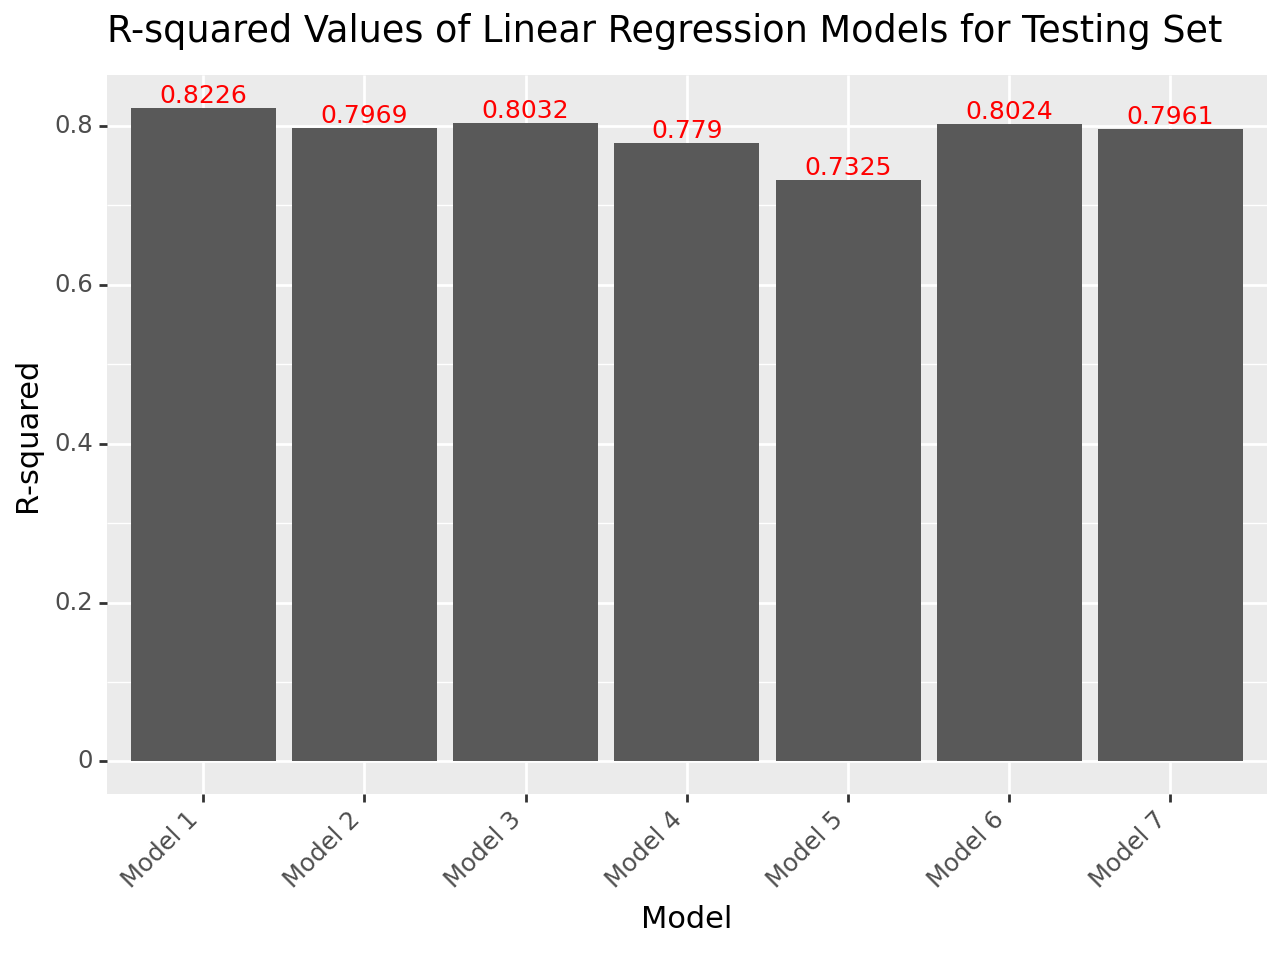

<Figure Size: (640 x 480)>

In [ ]:

R2_test = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
    'R_squared': [0.8226, 0.7969, 0.8032, 0.7790, 0.7325, 0.8024, 0.7961 ]
}

df_test = pd.DataFrame(R2_test)

(ggplot(df_test, aes(x='Model', y='R_squared')) +
 geom_col() + geom_text(aes(label='round(R_squared, 4)'), va='bottom', size=9 , color = "red") +
 labs(title='R-squared Values of Linear Regression Models for Testing Set', x='Model', y='R-squared') +
 theme(axis_text_x = element_text(angle = 45, hjust = 1))
)


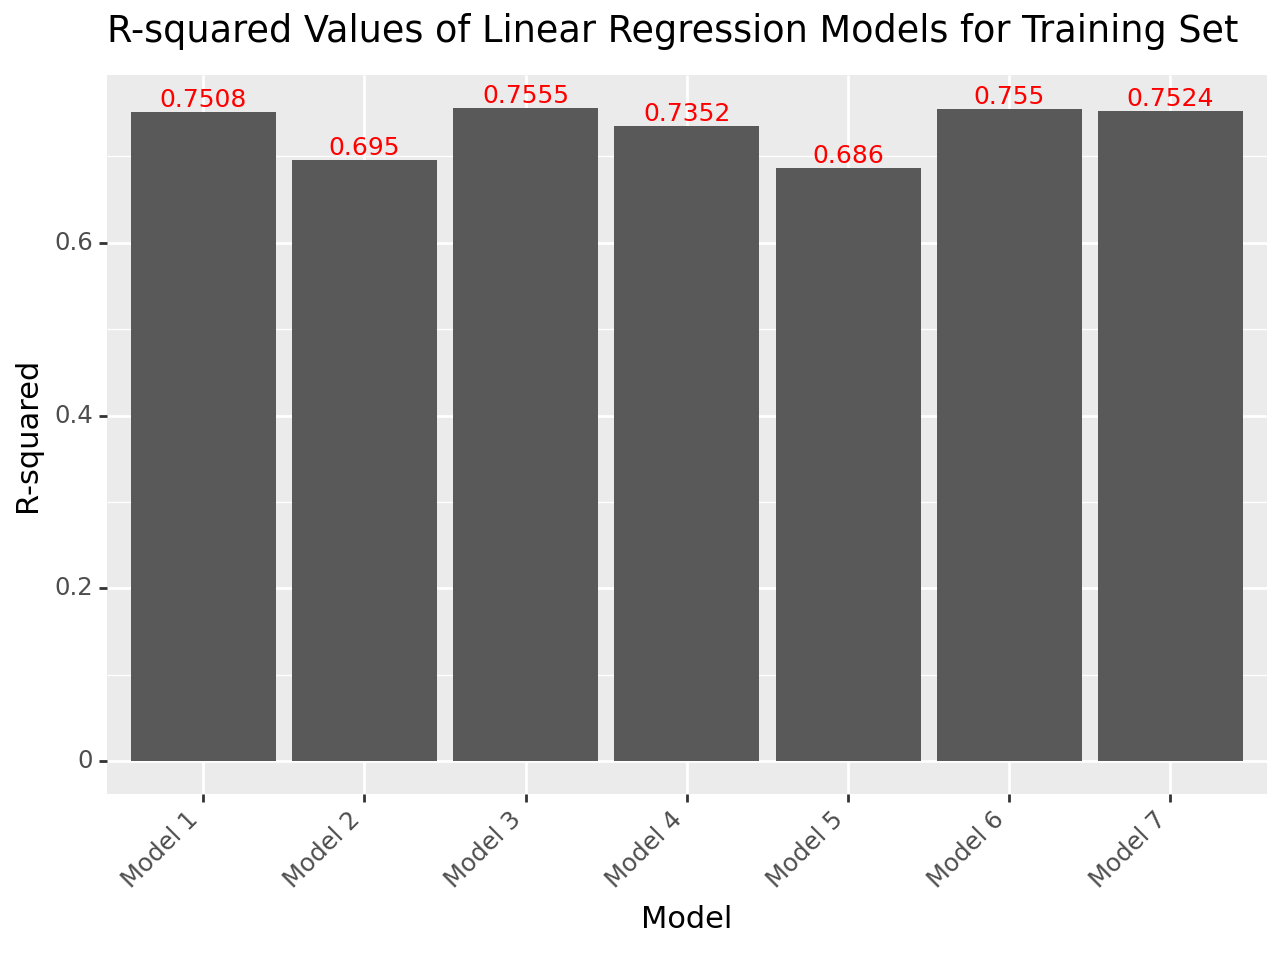

<Figure Size: (640 x 480)>

In [ ]:

R2_train = {
    'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'],
    'R_squared': [0.7508, 0.6950, 0.7555, 0.7352, 0.6860, 0.7550, 0.7524 ]
}

df_train = pd.DataFrame(R2_train)

(ggplot(df_train, aes(x='Model', y='R_squared')) +
 geom_col() + geom_text(aes(label='round(R_squared, 4)'), va='bottom', size=9 , color = "red") +
 labs(title='R-squared Values of Linear Regression Models for Training Set', x='Model', y='R-squared') +
 theme(axis_text_x = element_text(angle = 45, hjust = 1))
)


In [ ]:
# Question 2: Have there been any significant changes in the demographic composition of individuals involved in incidents over time
# and are there emerging trends or shifts in the age, gender, or racial/ethnic distribution of individuals reported in these incidents?


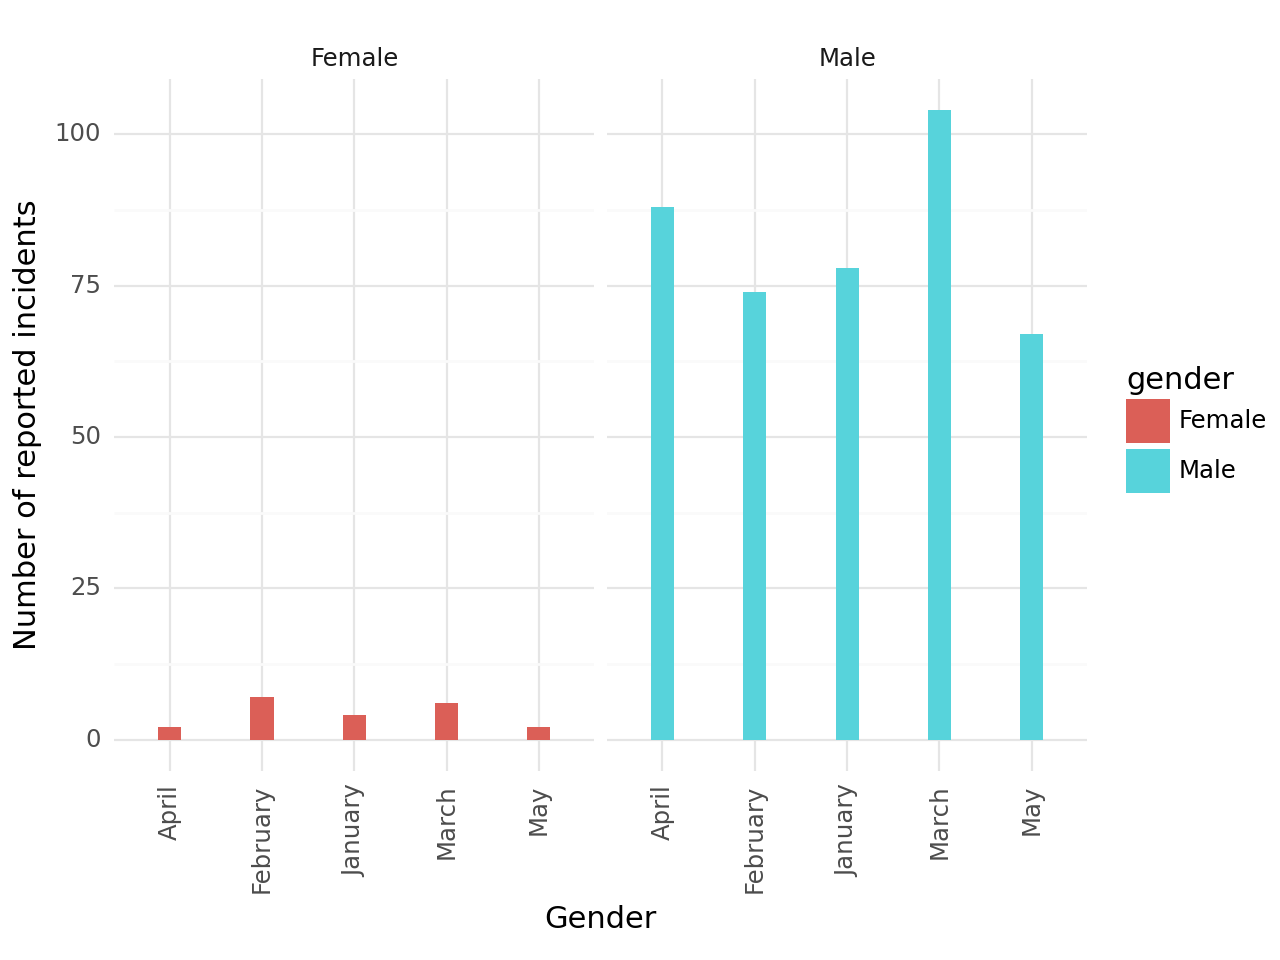

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(data, aes(x= "month",  fill = "gender")) + theme_minimal() + geom_histogram(binwidth=.25) + facet_grid("~gender") + theme(axis_text_x=element_text(rotation=90))+ labs(x = "Gender", y = "Number of reported incidents"))

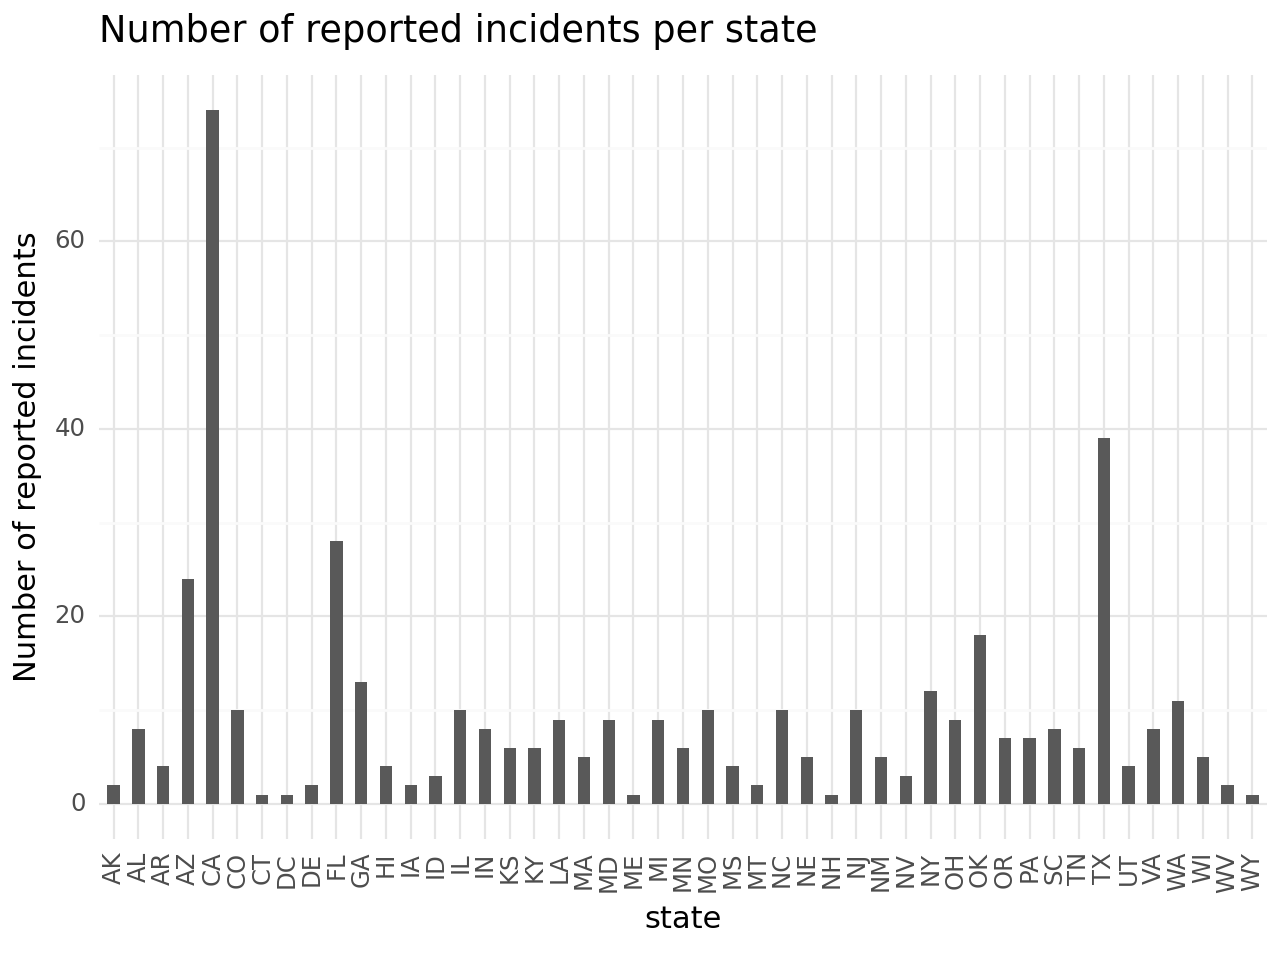

<Figure Size: (640 x 480)>

In [ ]:
(ggplot(data, aes(x= "state" )) + theme_minimal() + geom_histogram(binwidth = 0.5) + labs(x = "state", y = "Number of reported incidents", title = "Number of reported incidents per state")+ theme(axis_text_x=element_text(rotation=90)))

In [ ]:
race = data["raceethnicity"]
age = data["age"]
p_income = data['p_income']
h_income = data['h_income']

In [ ]:
table = pd.DataFrame({'race':race , 'age':age, 'p_income':p_income, 'h_income':h_income})

In [ ]:
table['race'].value_counts()


White                     215
Black                     127
Hispanic/Latino            64
Unknown                    12
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

In [ ]:
table.describe()

,age,p_income,h_income
count,432.000000,432.000000,432.000000
mean,37.166667,24360.886574,46692.159722
std,12.971144,9190.468457,20900.629249
min,16.000000,5457.000000,10290.000000
25%,27.000000,18163.750000,32509.250000
50%,35.000000,22203.000000,42563.000000
75%,45.000000,28700.000000,56728.000000
max,87.000000,86023.000000,142500.000000


In [ ]:
mean_age_by_race = data.groupby('raceethnicity')['age'].mean()
mean_age_by_race

raceethnicity
Asian/Pacific Islander    40.800000
Black                     33.582677
Hispanic/Latino           31.828125
Native American           27.750000
Unknown                   45.500000
White                     40.413953
Name: age, dtype: float64

In [ ]:
mean_p_income = data.groupby('raceethnicity')['p_income'].mean()
mean_p_income

raceethnicity
Asian/Pacific Islander    26342.100000
Black                     23021.582677
Hispanic/Latino           23102.000000
Native American           16921.750000
Unknown                   23533.250000
White                     25619.195349
Name: p_income, dtype: float64

In [ ]:
mean_h_income = data.groupby('raceethnicity')['h_income'].mean()
mean_h_income

raceethnicity
Asian/Pacific Islander    49482.000000
Black                     42571.464567
Hispanic/Latino           42857.781250
Native American           29803.000000
Unknown                   49804.416667
White                     50278.390698
Name: h_income, dtype: float64

In [ ]:
data.groupby('state')['raceethnicity'].nunique()

state
AK    2
AL    2
AR    3
AZ    5
CA    5
CO    4
CT    1
DC    1
DE    1
FL    3
GA    4
HI    2
IA    1
ID    1
IL    3
IN    2
KS    2
KY    2
LA    2
MA    2
MD    2
ME    1
MI    2
MN    3
MO    2
MS    1
MT    1
NC    2
NE    2
NH    1
NJ    5
NM    1
NV    2
NY    3
OH    2
OK    3
OR    2
PA    2
SC    2
TN    3
TX    4
UT    1
VA    3
WA    5
WI    2
WV    1
WY    1
Name: raceethnicity, dtype: int64

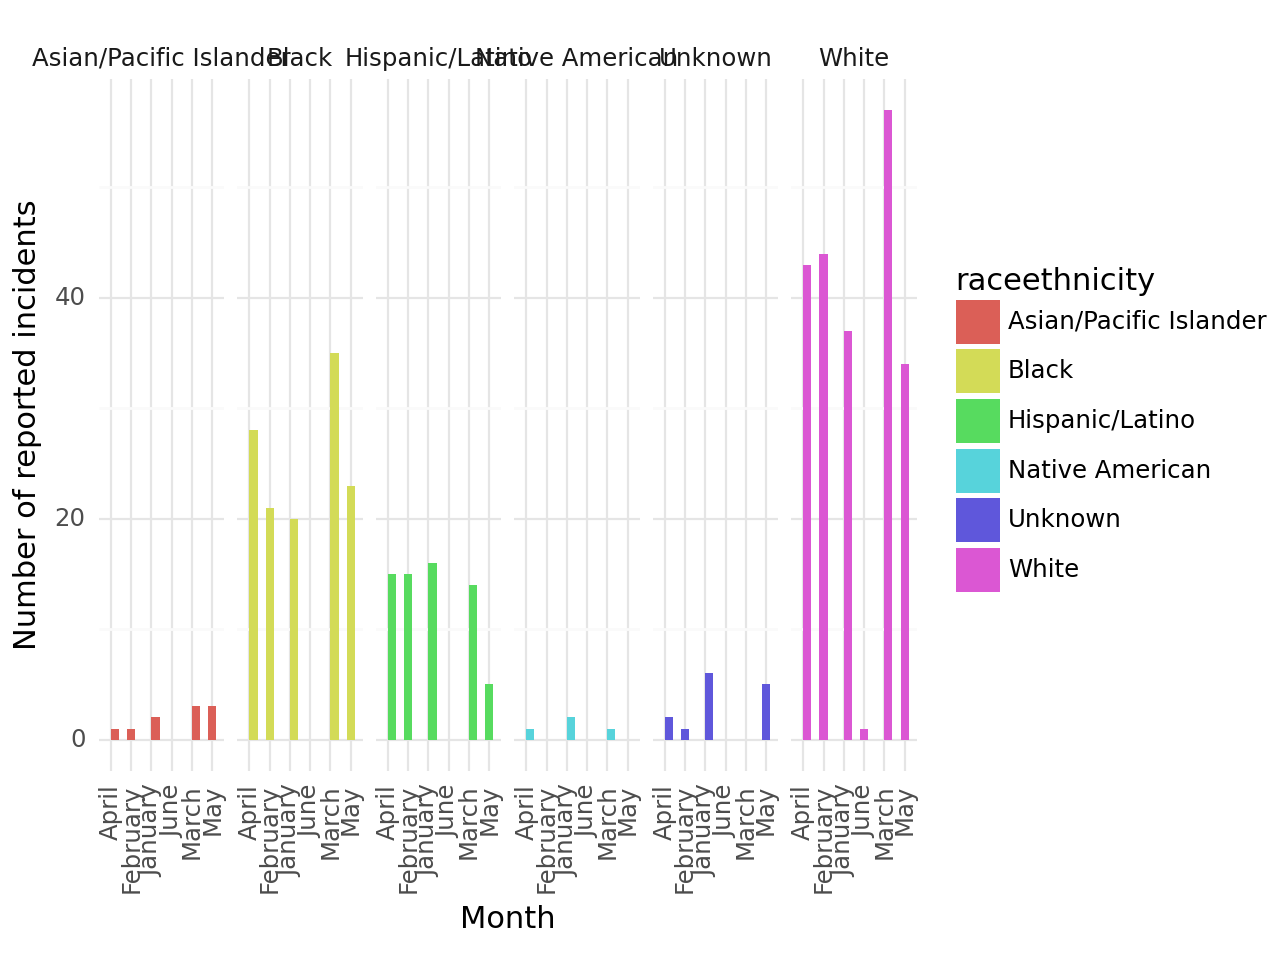

<Figure Size: (640 x 480)>

In [ ]:
data =pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/police-killings/police_killings.csv", encoding= 'unicode_escape')
data.dropna(inplace = True)
data.reset_index(inplace = True)
(ggplot(data, aes(x= "month", fill = "raceethnicity")) + theme_minimal() + geom_histogram(binwidth = .4) + facet_grid("~raceethnicity") + theme(axis_text_x=element_text(rotation=90))+ labs(x = "Month", y = "Number of reported incidents"))